**MULTIPLES CLASIFICADORES PARA UNA BASE DE DATOS PARA PREDECIR UN ATAQUE CARDIACO**

Conjunto de datos de análisis y predicción de ataques cardíacos
* age : Edad del paciente
* Sex : Sexo del paciente
* exang: angina inducida por el ejercicio (1 = sí; 0 = no)
* ca: número de buques principales (0-3)
* cp : Tipo de dolor torácico tipo de dolor torácico\
  Valor 1: angina típica\
  Valor 2: angina atípica\
  Valor 3: dolor no anginoso\
  Valor 4: asintomático
* trtbps: presión arterial en reposo (en mm Hg)
* chol: colestoral en mg/dl obtenido a través del sensor BMI
* fbs: (azúcar en sangre en ayunas > 120 mg/dl) (1 = verdadero; 0 = falso)
* rest_ecg : resultados electrocardiográficos en reposo\
  Valor 0: normal\
  Valor 1: tener anomalías en la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST > 0,05 mV)\
  Valor 2: mostrar hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes\
* thalach: frecuencia cardíaca máxima alcanzada
* objetivo: 0= menos posibilidades de ataque al corazón 1= más posibilidades de ataque al corazón





In [1]:
from google.colab import files 
uploaded = files.upload()

Saving heart.csv to heart.csv


Librerias

In [61]:
import pandas as pd 
import io 
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
np.random.seed(7)
df = pd.read_csv(io.BytesIO(uploaded['heart.csv'])) 
print(df)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  

In [3]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [4]:
X=df.iloc[:,:-1]
X

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  
0      0      1  
1      0      2  
2      0      2  
3      0      2  
4      0      2  
..   ...    ...  
298    0      3  
299    0      3  
300    2      3  
301    1      3  
302    1      2  

[303 rows x 13 columns]

In [5]:
y=df.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [6]:
# División de los datos en train y test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                       X,
                                       y,
                                        train_size   = 0.6,
                                        random_state = 1234,
                                        shuffle      = True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((181, 13), (122, 13), (181,), (122,))

Seleccion de las columnas

## Mínimos cuadrados ordinarios (OLS)

In [ ]:
# Creación y entrenamiento del modelo
# ==============================================================================
modelo = LinearRegression(normalize=True)
modelo.fit(X = X_train, y = y_train)

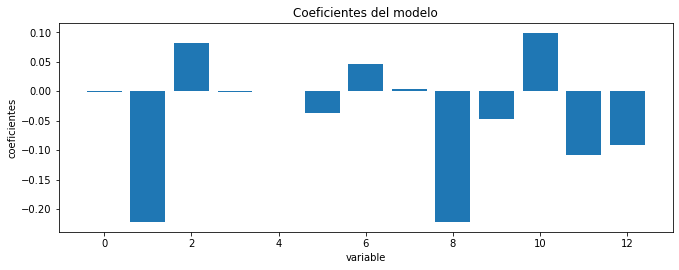

In [8]:
# Coeficientes del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.bar(range(13),modelo.coef_.flatten())
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [9]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones

array([ 0.38783614,  0.60082571,  0.53917448,  0.08989162,  0.30489714,
        0.93505236,  0.56079557,  0.70835248,  0.10862435,  0.59245919,
        0.66071189, -0.22727909, -0.01627854,  0.93745471, -0.07836774,
        0.56839046,  0.69782396,  1.02188183,  0.62432365,  0.93349729,
        0.80385092,  0.79902283,  0.54528735,  0.21045247,  0.62219084,
        0.98176587,  0.23476372,  0.73806579,  0.92420154,  0.82686032,
        0.54271135,  1.00746145,  0.79274811,  0.05314534,  0.22339575,
        0.14603442,  0.64866764,  0.9054037 ,  0.85208508,  0.67785823,
        0.68151035, -0.03069665,  0.79806193,  0.6647969 ,  0.91459921,
        0.58710028,  0.52849035,  0.13248498,  0.17985137,  0.09075504,
        0.50014186,  0.34281774,  0.96608771,  0.26623845,  0.21126248,
        0.73435712,  0.53917448,  0.55366187,  0.52892783,  0.25832073,
        0.28585078,  0.18949494, -0.16925962,  0.9075685 ,  0.62704446,
        0.90469607,  1.16254697,  1.06798623,  0.50786826,  1.26

In [10]:
# Error de test del modelo 
# ==============================================================================
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_ols}")



El error (rmse) de test es: 0.3868113331464546


## Ridge (Cresta)

In [ ]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto RidgeCV utiliza el mean squared error
modelo = RidgeCV(
            alphas          = np.logspace(-10, 2, 200),
            fit_intercept   = True,
            normalize       = True,
            store_cv_values = True
         )

_ = modelo.fit(X = X_train, y = y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

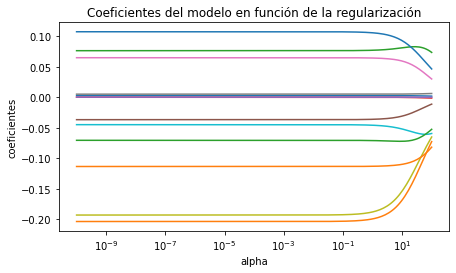

In [12]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelo.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

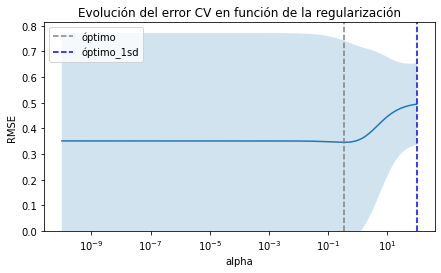

In [13]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.cv_values almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_samples, n_targets, n_alphas)
mse_cv = modelo.cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = modelo.cv_values_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas[rmse_cv == min_rsme_1sd]


# Gráfico del error +- 1 desviación estándar
############################################
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas, rmse_cv)
ax.fill_between(
    modelo.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)
ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [14]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 0.33700643292719246


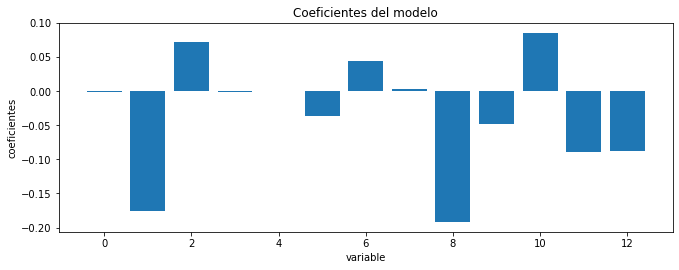

In [15]:
# Coeficientes del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.bar(range(13),modelo.coef_.flatten())
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [16]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones

array([ 0.39859054,  0.60699217,  0.58565056,  0.13999531,  0.31200534,
        0.878105  ,  0.55013225,  0.70480805,  0.17448005,  0.60776037,
        0.64893622, -0.13414098,  0.03832708,  0.8923778 , -0.01391406,
        0.53886572,  0.67770028,  0.95231996,  0.61472081,  0.88088718,
        0.79373904,  0.78149957,  0.54917433,  0.24064149,  0.60916727,
        0.914578  ,  0.28013755,  0.73286092,  0.89327172,  0.78351199,
        0.56118403,  0.97481121,  0.74714635,  0.09232252,  0.25837937,
        0.20004135,  0.65205002,  0.86436209,  0.83666471,  0.67288502,
        0.66088174,  0.03797102,  0.76284731,  0.64956512,  0.89234487,
        0.57001765,  0.53616276,  0.17706741,  0.20500213,  0.15784848,
        0.54533134,  0.34378983,  0.93467574,  0.3087709 ,  0.25210521,
        0.74156243,  0.58565056,  0.55151409,  0.51073778,  0.29999541,
        0.33060886,  0.21956722, -0.09188391,  0.84417312,  0.61357454,
        0.87737015,  1.090237  ,  1.00406108,  0.5283541 ,  1.18

In [17]:
# Error de test del modelo 
# ==============================================================================
rmse_ridge = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_ridge}")


El error (rmse) de test es: 0.38526365647633004


Los errores de los modelos OLS y RIDGE son los siguientes 

In [18]:
rmse_ols, rmse_ridge,

(0.3868113331464546, 0.38526365647633004)

En conclusion, tanto para bridge como para OLS las colnmnas que se pueden usar son: age, trtbps, chol y thalachh.

In [19]:
X_sel=X.iloc[:,[0,3,4,7]]
X_sel

age  trtbps  chol  thalachh
0     63     145   233       150
1     37     130   250       187
2     41     130   204       172
3     56     120   236       178
4     57     120   354       163
..   ...     ...   ...       ...
298   57     140   241       123
299   45     110   264       132
300   68     144   193       141
301   57     130   131       115
302   57     130   236       174

[303 rows x 4 columns]

CLASIFICACIÓN METODO DE VECINOS CERCANOS

In [20]:
X_sel.hist()
plt.show()

In [43]:
X1_train, X1_test, y_train, y_test = model_selection.train_test_split(X_sel,y, test_size=0.4)
X1_train.shape, X1_test.shape, y_train.shape, y_test.shape

((181, 4), (122, 4), (181,), (122,))

Ahora se averigua el mejor K

In [44]:
for k in range(1,181,1):
    n_neighbors = k
    knn = KNeighborsClassifier(n_neighbors)
    knn.fit(X1_train, y_train)
    print('Precision en los valores de entrenamiento: {:.2f}'
        .format(knn.score(X1_train, y_train)))
    print('Precision en los valores de prueba: {:.2f}'
        .format(knn.score(X1_test, y_test)))

Precision en los valores de entrenamiento: 1.00
Precision en los valores de prueba: 0.56
Precision en los valores de entrenamiento: 0.80
Precision en los valores de prueba: 0.60
Precision en los valores de entrenamiento: 0.80
Precision en los valores de prueba: 0.58
Precision en los valores de entrenamiento: 0.73
Precision en los valores de prueba: 0.61
Precision en los valores de entrenamiento: 0.75
Precision en los valores de prueba: 0.61
Precision en los valores de entrenamiento: 0.73
Precision en los valores de prueba: 0.67
Precision en los valores de entrenamiento: 0.74
Precision en los valores de prueba: 0.66
Precision en los valores de entrenamiento: 0.73
Precision en los valores de prueba: 0.68
Precision en los valores de entrenamiento: 0.73
Precision en los valores de prueba: 0.66
Precision en los valores de entrenamiento: 0.71
Precision en los valores de prueba: 0.67
Precision en los valores de entrenamiento: 0.70
Precision en los valores de prueba: 0.66
Precision en los valo

Vemos que la mejor combinción de precisión que nos da es de 73% en el set de entrenamiento y del 68% para el de test para K=8.

In [45]:
clf = KNeighborsClassifier(n_neighbors=8)
clf.fit(X1_train, y_train)
print(clf.predict_proba([[63,145,233,150]]))

[[0.25 0.75]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


Para el ejemplo se puede observar que tiene 75% de probabilidad que tenga un paro cardiaco y el 25% que no tenga paro cardiaco

In [60]:
pred = clf.predict(X1_train)
print(confusion_matrix(y_train, pred))

[[57 24]
 [24 76]]


**CLASIFICADOR BAYESIANO INGENUO**

In [55]:
clf1 = GaussianNB()
clf1.fit(X1_train, y_train)
print(clf1.predict_proba([[63,145,233,150]]))

[[0.52221254 0.47778746]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


Para el ejemplo se puede observar que tiene 47.77% de probabilidad que tenga un paro cardiaco y el 52.22% que no tenga paro cardiaco

---



In [56]:
accuracy_score(y_train, clf1.predict(X1_train))

0.7071823204419889

In [57]:
confusion_matrix(y_train, clf1.predict(X1_train))

array([[52, 29],
       [24, 76]])

In [58]:
accuracy_score(y_test, clf1.predict(X1_test))

0.6885245901639344

In [59]:
confusion_matrix(y_test, clf1.predict(X1_test))

array([[32, 25],
       [13, 52]])

Vemos que la mejor combinción de precisión que nos da es de 70.7% en el set de entrenamiento y del 68.85% para el de test

**CLASIFICADOR REDES NEURONALES**

In [83]:
mlp=MLPClassifier(hidden_layer_sizes=(8,8,8), max_iter=500, alpha=0.0001,
                     solver='adam', random_state=21,tol=0.000000001)
mlp.fit(X1_train,y_train)
print(mlp.predict_proba([[63,145,233,150]]))

[[0.5638506 0.4361494]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


Para el ejemplo se puede observar que tiene 43.61% de probabilidad que tenga un paro cardiaco y el 56.38% que no tenga paro cardiaco

In [84]:
accuracy_score(y_train, mlp.predict(X1_train))

0.7237569060773481

In [85]:
confusion_matrix(y_train, mlp.predict(X1_train))

array([[54, 27],
       [23, 77]])

In [86]:
accuracy_score(y_test, mlp.predict(X1_test))

0.6557377049180327

In [87]:
confusion_matrix(y_test, mlp.predict(X1_test))

array([[29, 28],
       [14, 51]])

Vemos que la mejor combinción de precisión que nos da es de 72.37% en el set de entrenamiento y del 65.57% para el de test

Conclusion\
Lo que se puedo observar es que el clasificador vecino más cercano cuando k=8 tiene la mejor presición para el entrenamiento con un 78% y para el test la mejor presición es el clasificador bayesiano ingenuo con un 68.85%.
